<a href="https://colab.research.google.com/github/tynimattias/EENG_321_Labs/blob/main/321_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.15900000000000059


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

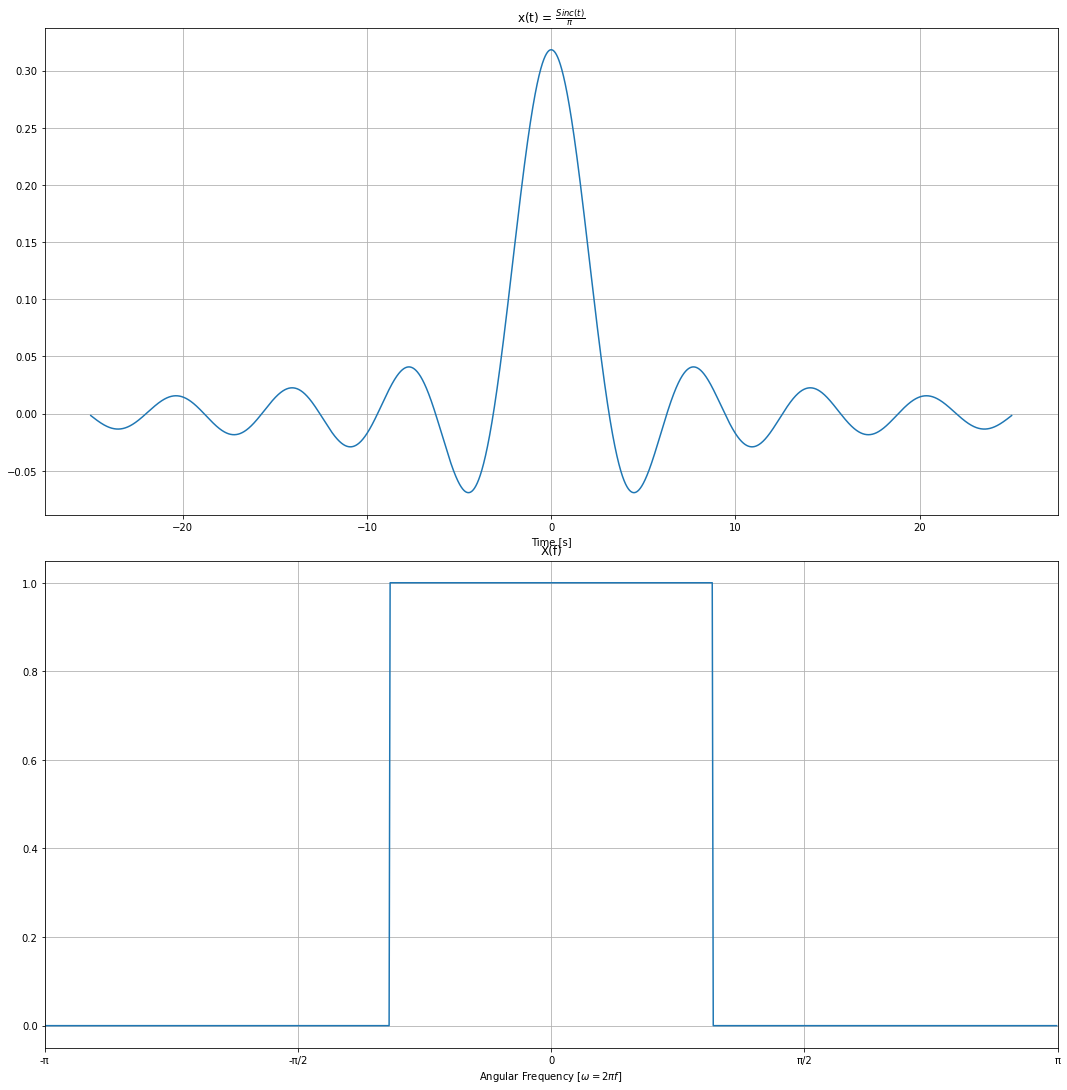

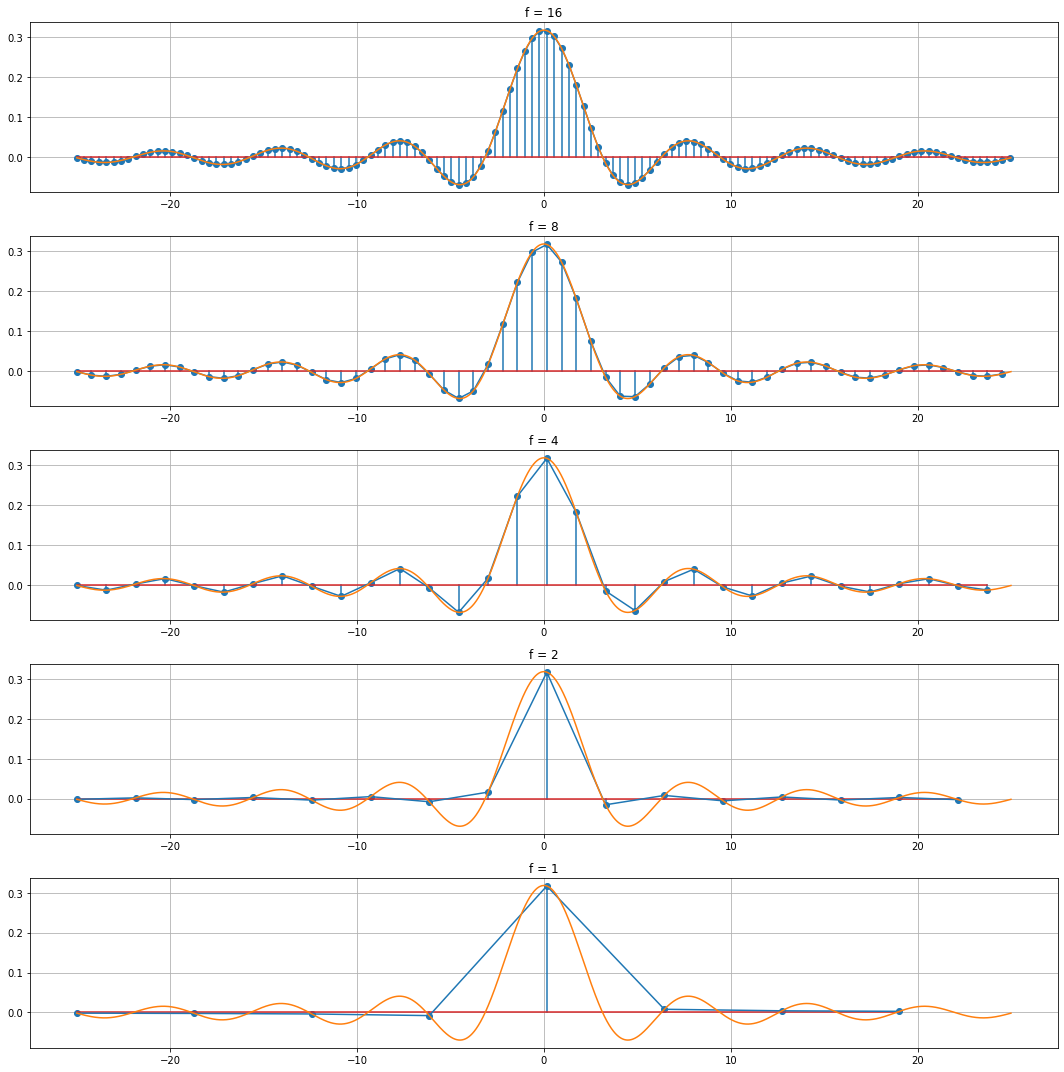

In [41]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

t = sym.symbols('t')
f = sym.symbols('f')

xt = sym.sinc(t)/np.pi

time_min = -25
time_max = 25
time_step = 0.001
time = np.arange(time_min, time_max, time_step)

fmin = -0.5
fmax = 0.5
fstep = 0.001
frequency = np.arange(fmin, fmax, fstep)

Xf = sym.fourier_transform(xt, t, f)

Xftemp = sym.lambdify(f, Xf)

Xf = Xftemp(frequency)

xttemp = sym.lambdify(t, xt)
xt = xttemp(time)

plt.figure(1)

plt.subplot(211)
plt.tight_layout()
plt.grid(True)
plt.title(r'x(t) = $\frac{Sinc(t)}{\pi}$')
plt.xlabel('Time [s]')
plt.plot(time, xt)



plt.subplot(212)
plt.grid(True)
plt.tight_layout()
plt.plot(frequency*2*np.pi, Xf)
plt.xlim([-np.pi, np.pi])
plt.title(f'X(f)')
plt.xlabel('Angular Frequency [$\omega = 2\pi f$]')
plt.xticks(np.arange(-np.pi, np.pi+(np.pi/2), np.pi/2), ['-π','-π/2','0','π/2','π'])

non_zero_values = []

for i in range(len(frequency)):
  if(Xf[i]!= 0):
    non_zero_values.append(frequency[i])

print(max(non_zero_values))


fmax = max(non_zero_values) 

f = [16, 8,4,2,1]

plt.figure(2)
plt.rcParams['figure.figsize'] = [15, 15]

for i, freq in enumerate(f):

  plt.subplot(len(f),1,i+1)
  plt.tight_layout()

  plt.title(f'f = {freq}')
  
  Ts = 1 / (fmax*freq)

  n = np.arange(time_min, time_max, Ts)


  xtnew = sym.sinc(t)/np.pi
  xttempnew = sym.lambdify(t, xtnew)
  xtnew = xttempnew(n)



  plt.figure(2)
  plt.stem(n, xtnew)
  plt.grid(True)
  plt.plot(n, xtnew)
  plt.plot(time, xt)




Maximum frequency of x(t) is 1 rads/sec = 0.159 [Hz]

Nyquist Rate = 0.318 [Hz] or 2 rads/sec


